In [2]:
import graphviz
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# 为了便于说明，我们将两个类别重命名为"blue"和"red"
y_named = np.array(["blue", "red"])[y]
# 我们可以对任意个数组调用train_test_split
# 所有数组的划分方式都是一致的
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
 train_test_split(X, y_named, y, random_state=0)
# 构建梯度提升模型
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [7]:
print("X_test: {}".format(X_test))
print("Decision function: {}".format(
 gbrt.decision_function(X_test)))

X_test: [[ 0.13179551 -0.53591877]
 [-0.71786926  0.03192209]
 [-0.36118825 -1.4007017 ]
 [ 0.94124669 -0.01979147]
 [ 0.26516411 -0.03906867]
 [-0.4522767  -0.01130911]
 [-1.16124083 -0.74556572]
 [-0.06229749  0.3606729 ]
 [ 0.44576743  0.37933649]
 [-0.46857754 -0.2812264 ]
 [ 1.10502884  0.68569017]
 [-0.06939159  0.15029222]
 [-0.26942143 -0.42215965]
 [ 0.73776469 -0.06026285]
 [-0.48984706 -0.07126104]
 [-0.07320389  0.79692206]
 [ 0.47159612 -0.34434378]
 [-0.72283227  0.43895304]
 [ 0.15324214 -0.39398671]
 [-0.24030273  0.4245925 ]
 [ 0.12192553  0.34556373]
 [-0.64588516  0.27681644]
 [-0.68154165  0.00577195]
 [-0.88338853  0.70110336]
 [ 0.40664642 -0.69430408]]
Decision function: [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106
 -7.69097177  4.11001634  1.10753883  3.40782247 -6.46262729  4.28986668
  3.90156371 -1.20031192  3.66166106 -4.17231209 -1.23010022 -3.91576275
  4.03602808  4.11001634  4.11001634  0.65708962  2.69826291 -2.65673325
 -1.8

In [8]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(
 gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


In [9]:
print("Thresholded decision function:\n{}".format(
 gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [10]:
# 将布尔值True/False转换成0和1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# 利用0和1作为classes_的索引
pred = gbrt.classes_[greater_zero]
# pred与gbrt.predict的输出完全相同
print("pred is equal to predictions: {}".format(
 np.all(pred == gbrt.predict(X_test))))

pred is equal to predictions: True


In [11]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
 np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


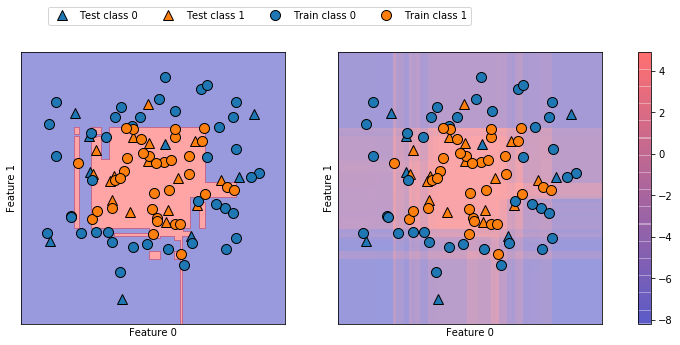

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
 fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
 alpha=.4, cm=mglearn.ReBl)
for ax in axes:
 # 画出训练点和测试点
 mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
 markers='^', ax=ax)
 mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
 markers='o', ax=ax)
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
 "Train class 1"], ncol=4, loc=(.1, 1.1))

In [17]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


In [19]:
# 显示predict_proba的前几个元素
print("Predicted probabilities:\n{}".format(
 gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


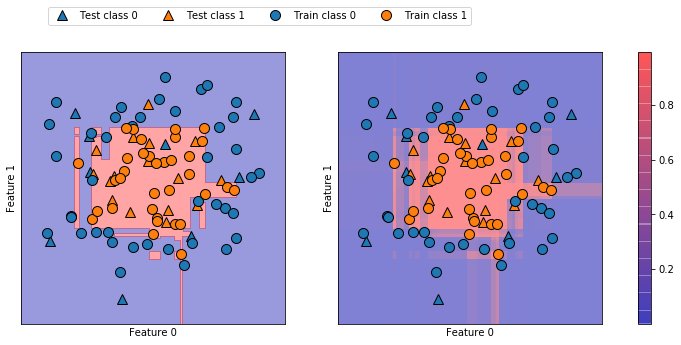

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(
 gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
 gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
     # 画出训练点和测试点
     mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
     markers='^', ax=ax)
     mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
     markers='o', ax=ax)
     ax.set_xlabel("Feature 0")
     ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
 "Train class 1"], ncol=4, loc=(.1, 1.1))